In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install pygeos
!pip install topojson
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
#!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
#!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

In [148]:
eff = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')

In [114]:
eff.shape

(4057201, 16)

In [131]:
eff

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,prev,niveau_prioritaire,libelle_classe_age,libelle_sexe,tri
0,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,1,971,290.0,4210.0,6.912,"2,3",de 80 à 84 ans,hommes,51.0
1,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,3,973,40.0,650.0,5.864,"2,3",de 80 à 84 ans,hommes,51.0
2,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,4,999,410.0,5630.0,7.340,"2,3",de 80 à 84 ans,hommes,51.0
3,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,6,999,20.0,350.0,4.913,"2,3",de 80 à 84 ans,hommes,51.0
4,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,75,2960.0,20820.0,14.221,"2,3",de 80 à 84 ans,hommes,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057196,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,34,130.0,78510.0,0.168,"1,2,3",de 20 à 24 ans,tous sexes,6.0
4057197,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,46,20.0,8020.0,0.187,"1,2,3",de 20 à 24 ans,tous sexes,6.0
4057198,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,81,40.0,21540.0,0.195,"1,2,3",de 20 à 24 ans,tous sexes,6.0
4057199,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,82,30.0,15020.0,0.226,"1,2,3",de 20 à 24 ans,tous sexes,6.0


In [141]:
len(eff['patho_niv1'].unique())


18

In [19]:
len(eff['cla_age_5'].unique())

22

In [142]:
#On a 4 valeurs pour la variable sexe
len(eff['sexe'].unique())

4

In [143]:
eff['sexe'].isin([1.0, 2.0]).sum()

2663640

In [89]:
eff['sexe'].eq(9.0).sum()

1393560

In [144]:
#On regroupe toutes les valeurs inconnues
#On n'a plus que 3 valeurs possibles pour sexe
eff['sexe'].replace(9.0, np.nan, inplace=True)

In [145]:
len(eff['sexe'].unique())

3

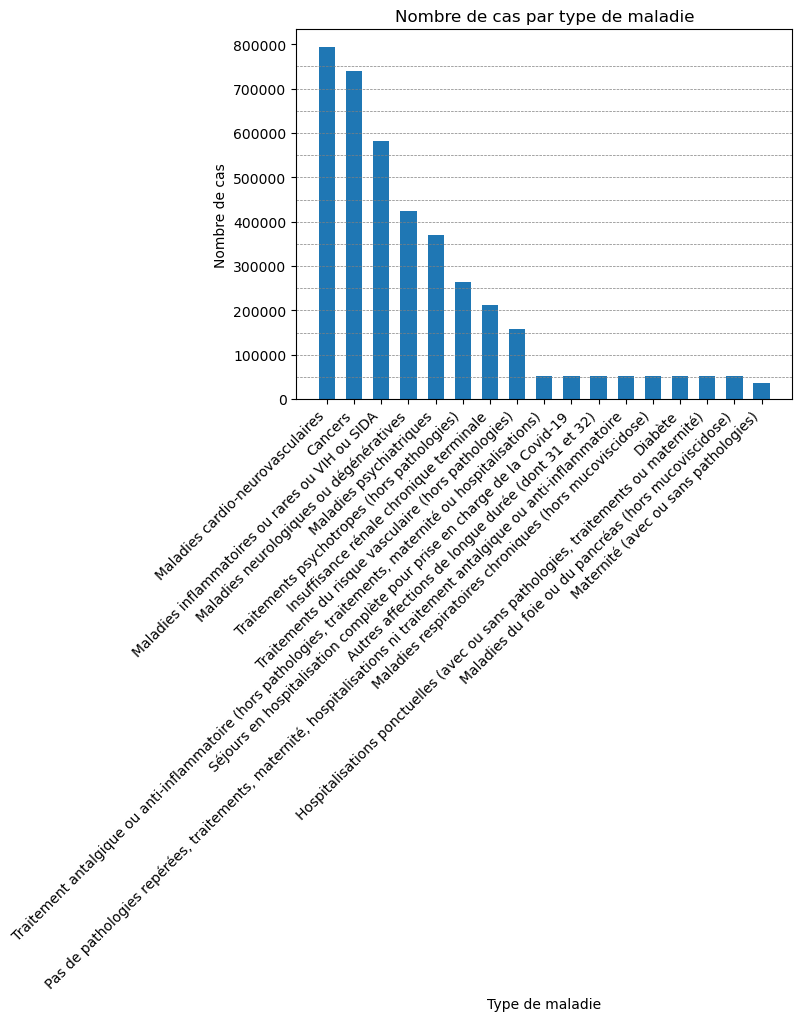

In [146]:
#Diagramme en barres sur le nombre de cas par type de maladie

# Compter le nombre de cas par type de maladie
counts = eff['patho_niv1'].value_counts()

# Créer le diagramme en barres
plt.bar(counts.index, counts.values,  width=0.6)
plt.xlabel('Type de maladie')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par type de maladie')

# Ajouter des lignes horizontales en arrière-plan
for y in range(0, max(counts.values) + 1, 50000):  # Ajuster l'espacement des lignes selon vos besoins
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5)

# Rotation des étiquettes en diagonale
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#Cela pourrait être pas mal de faire un diagramme sur la proportion
# de la population de chaquee département/région qui a été touchée par une des telles maladies
#mais pour cela il faudrait la population totale de chaque département

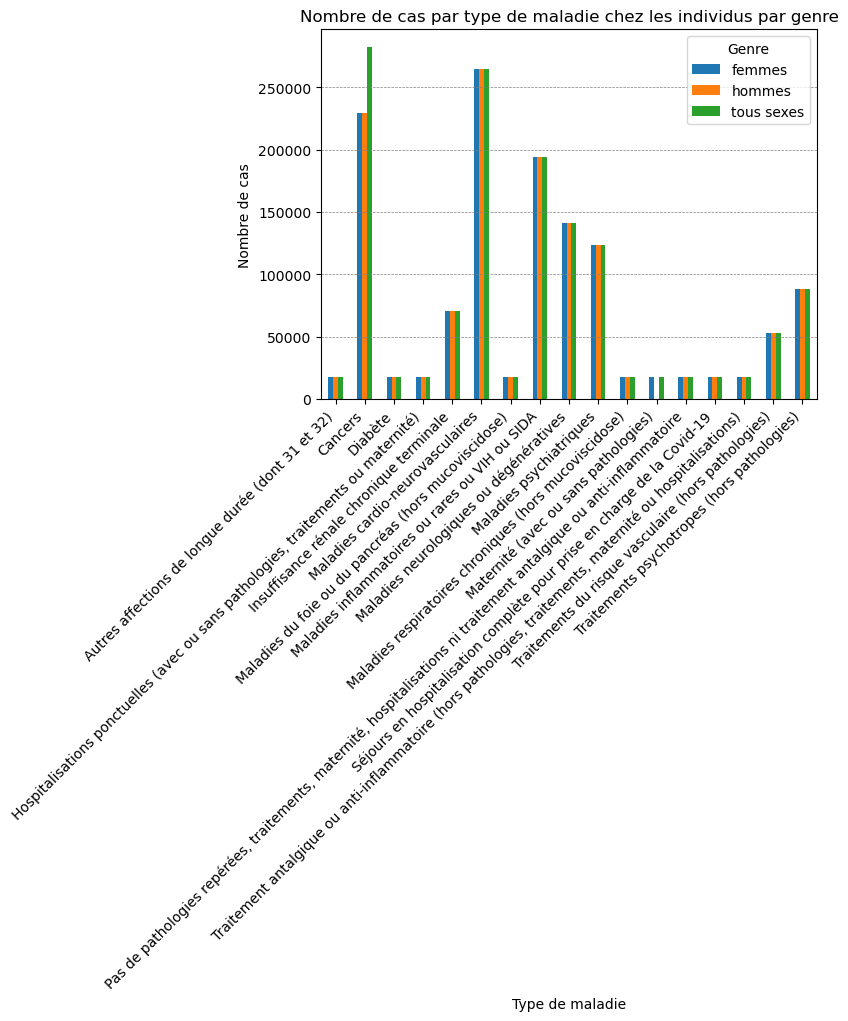

In [117]:
#Diagramme en barre pour le nombre de malades en fonction du sexe
#On ne voit pas de différence à cause de l'échelle
#sélectionner qq colonnes et "zoomer"
#en fait les résultats affichés me paraissent louches

# Compter le nombre de cas par type de maladie et par genre
counts = eff.groupby(['patho_niv1', 'libelle_sexe']).size().unstack(fill_value=0)

# Créer le diagramme en barres
ax = counts.plot(kind='bar', stacked=False)

# Ajouter des lignes horizontales dans l'arrière-plan
for y in range(50, max(counts.max())+1, 50000):
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Orienter le texte sur l'axe des x 
plt.xticks(rotation=45, ha='right')


plt.xlabel('Type de maladie')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par type de maladie chez les individus par genre')
plt.legend(title='Genre', loc='upper right')

plt.show()


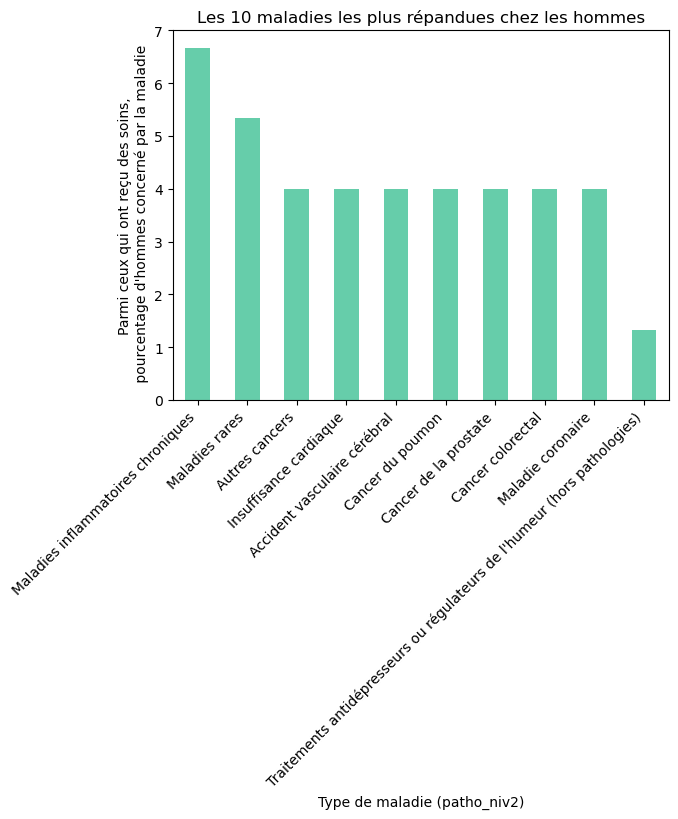

In [118]:
# Maladies les plus répandues chez les hommes

patho_niv3_counts = eff[eff['sexe'] == 1.0]['patho_niv2'].value_counts()

# Sélectionner les 10 maladies les plus répandues
top_10_maladies = patho_niv3_counts.head(10)

# Calculer le pourcentage d'hommes ayant contracté chaque maladie parmi l'ensemble de la population soignée
pourcentages = (top_10_maladies / len(eff[eff['sexe'] == 1.0])) * 100

# Créer le graphique en barres
pourcentages.plot(kind='bar', color='mediumaquamarine')


plt.xlabel('Type de maladie (patho_niv2)')
plt.ylabel('Parmi ceux qui ont reçu des soins,\n pourcentage d\'hommes concerné par la maladie')
plt.title('Les 10 maladies les plus répandues chez les hommes')
plt.xticks(rotation=45, ha='right')

plt.show()

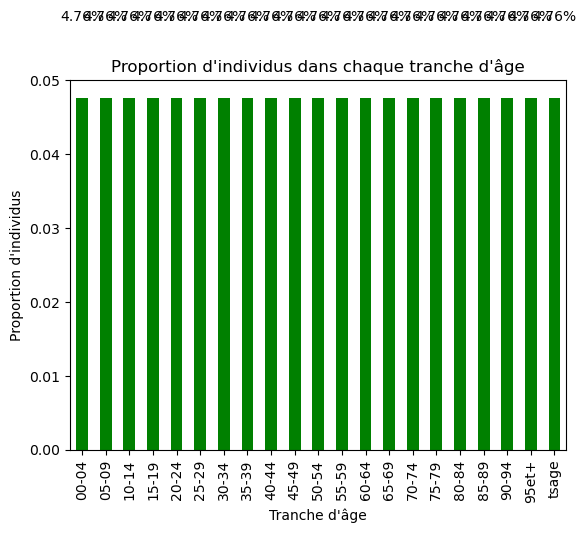

In [139]:
# il y a autant de personnes pour chaque classe d'âge comme le montre le graph
# faire attention à l'interprétation causale !!!!

# Compter le nombre d'individus par tranche d'âge
age_counts = eff['cla_age_5'].value_counts()

# Calculer la proportion d'individus dans chaque tranche d'âge
age_proportions = age_counts / age_counts.sum()

# Trier les proportions par index (tranches d'âge) en ordre croissant
age_proportions = age_proportions.sort_index()

# Créer le diagramme en barres
ax = age_proportions.plot(kind='bar', color='green')

# Ajouter des étiquettes aux barres
for i, proportion in enumerate(age_proportions):
    ax.text(i, proportion + 0.01, f'{proportion:.2%}', ha='center', va='bottom')

plt.xlabel('Tranche d\'âge')
plt.ylabel('Proportion d\'individus')
plt.title('Proportion d\'individus dans chaque tranche d\'âge')
plt.show()


In [149]:
#valide le fait qu'il y a autant d'indiv dans chaque classe d'âge
for x in eff['cla_age_5'].unique():
   print(x, eff['cla_age_5'].eq(x).sum())

80-84 193200
85-89 193200
90-94 193200
95et+ 193200
tsage 193200
00-04 193200
05-09 193200
10-14 193200
15-19 193200
20-24 193200
25-29 193200
30-34 193200
35-39 193200
40-44 193200
45-49 193200
50-54 193200
55-59 193200
60-64 193200
65-69 193200
70-74 193200
75-79 193200
nan 0


In [157]:
data_pollution = pd.read_csv("base_pollution.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [158]:
data_pollution

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,DEP,REG
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01,84
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01,84
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,01,84
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,01,84
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,01,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109,95,11
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370071,403.404815,95,11
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830247,12217.122402,13849.512001,95,11
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725,95,11


In [173]:
pollution_group_dep = pd.read_csv("pollution_group_dep.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [178]:
pollution_group_reg = pd.read_csv("pollution_group_reg.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [195]:
pollution_group_dep

,DEP,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01,8.075850e+05,15647.945725,2.581109e+02,7.119048e+05,275415.025873,113596.600977,706549.858520,5.522627e+05,1.635350e+06,418646.522003
1,02,1.276261e+06,58834.836998,2.521642e+03,6.174937e+05,180245.578283,60366.151368,737319.268428,6.388608e+05,1.386403e+06,325014.134252
2,03,1.949985e+06,19686.272920,5.451597e+02,5.659226e+05,111219.488315,102975.024821,457513.404309,4.457248e+05,1.164762e+06,224487.970942
3,04,3.632657e+05,5851.619941,0.000000e+00,1.160564e+05,50541.206026,12184.836311,60899.229209,1.168361e+05,3.905682e+05,98228.256513
4,05,3.103814e+05,6216.001726,0.000000e+00,8.433816e+04,22268.075401,5455.510286,16013.281334,1.224274e+05,3.458587e+05,77885.624538
...,...,...,...,...,...,...,...,...,...,...,...
91,91,1.565447e+05,839544.846964,1.257594e+06,7.285136e+05,293317.174006,105597.205576,368638.793346,1.280296e+06,2.073377e+06,757884.411113
92,92,9.140818e+01,12340.794839,2.101194e+02,1.067889e+06,264497.880711,242842.018012,706597.424067,1.466794e+06,1.198420e+06,836013.153414
93,93,2.018471e+03,59617.086124,1.101400e+06,7.259516e+05,252166.943778,102837.663903,433216.360990,1.316452e+06,1.396911e+06,863017.791777
94,94,2.259430e+03,218992.353559,3.146283e+05,6.914050e+05,213619.661516,76341.230740,467189.038927,1.336894e+06,1.169432e+06,763650.187110


In [182]:
pollution_group_reg

,REG,Nom de la région,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,11,Île-de-France,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
1,24,Occitanie,9.216468e+06,9.403150e+05,7.127516e+05,5.085909e+06,1.148631e+06,5.235770e+05,3.855530e+06,4.601612e+06,1.270235e+07,3.415642e+06
2,27,Bourgogne-Franche-Comté,8.058068e+06,2.734776e+05,1.158992e+04,4.371869e+06,5.557502e+05,4.486914e+05,2.756607e+06,3.432179e+06,7.942005e+06,1.814003e+06
3,28,Centre-Val de Loire,5.429369e+06,7.471300e+04,1.541066e+04,3.215651e+06,4.653129e+05,3.900968e+05,2.351066e+06,2.841666e+06,6.865600e+06,1.698426e+06
4,32,Hauts-de-France,6.208521e+06,3.312563e+05,1.134901e+06,5.419011e+06,1.394532e+06,2.955446e+06,1.594452e+07,7.333624e+06,1.118120e+07,3.713517e+06
5,44,Grand Est,8.733498e+06,5.292856e+05,7.605698e+05,7.295111e+06,1.227595e+06,1.327028e+06,1.203603e+07,7.336476e+06,1.252523e+07,3.692463e+06
6,52,Pays de la Loire,8.572066e+06,2.553621e+05,3.820464e+05,3.730637e+06,7.306768e+05,1.976390e+06,3.471932e+06,3.438540e+06,7.562122e+06,2.352564e+06
7,53,Bretagne,7.663104e+06,2.846105e+05,8.055797e+04,3.331220e+06,6.508873e+05,3.985401e+05,1.590004e+06,2.892887e+06,6.517828e+06,2.085653e+06
8,75,Nouvelle-Aquitaine,1.298515e+07,4.415826e+05,8.782023e+05,7.143234e+06,1.427269e+06,6.529124e+05,5.175242e+06,5.802500e+06,1.397049e+07,3.653666e+06
9,76,Normandie,7.448869e+06,1.098588e+05,3.003969e+06,3.979517e+06,8.339382e+05,4.819812e+06,8.067550e+06,3.333541e+06,7.314990e+06,2.183714e+06


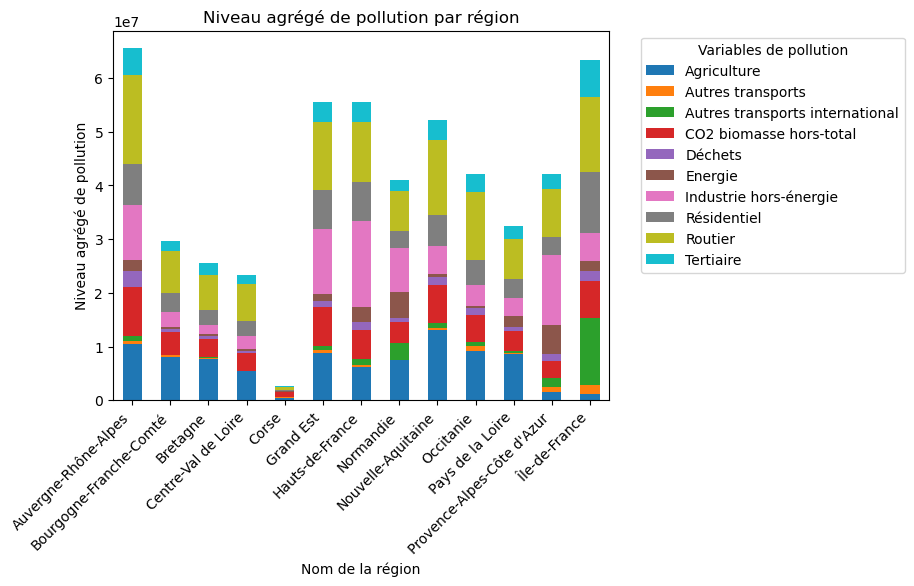

In [191]:
# Sommez les colonnes 3 à 12 pour chaque région
pollution_agregee = pollution_group_reg.groupby('Nom de la région').sum().iloc[:, 1:11]

# Créez un histogramme
pollution_agregee.plot(kind='bar', stacked=True)
plt.xlabel('Nom de la région')
plt.ylabel('Niveau agrégé de pollution')
plt.title('Niveau agrégé de pollution par région')
plt.legend(title='Variables de pollution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()

In [216]:
x = input("Entrer un numéro de département (mettre un 0 devant si c'est un chiffre) : ")

Entrer un numéro de département (mettre un 0 devant si c'est un chiffre) :  03


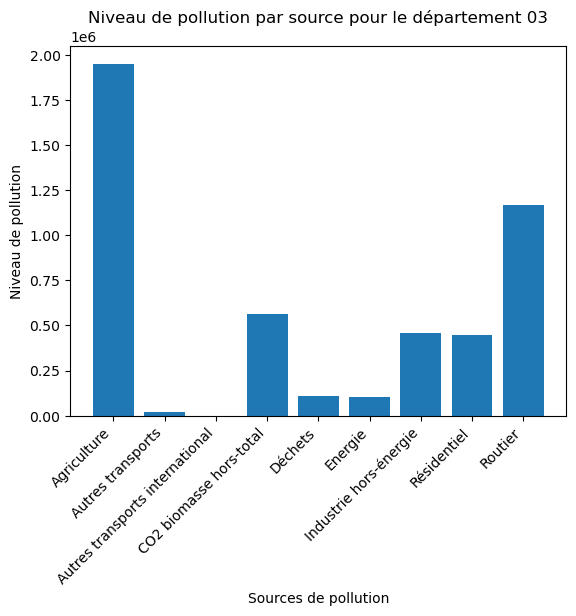

In [217]:
# Sélectionnez les données pour le département x
pollution_dep_91 = pollution_group_dep[pollution_group_dep['DEP'] == x]

# Sélectionnez les colonnes correspondant aux sources de pollution
sources_pollution = pollution_dep_91.columns[1:10]

# Créez un diagramme en barres
plt.bar(sources_pollution, pollution_dep_91.iloc[0, 1:10])
plt.xlabel('Sources de pollution')
plt.ylabel('Niveau de pollution')
plt.title('Niveau de pollution par source pour le département {}'.format(x))
plt.xticks(rotation=45, ha='right')

plt.show()


In [166]:
# Fusion des tables effectifs et pollution_group_dep
malades_et_pollution_dep = pd.merge(eff, pollution_group_dep, 
                    left_on=[eff['dept']], 
                    right_on=[pollution_group_dep['DEP']], 
                    how='inner').drop(columns=['key_0'])

In [167]:
malades_et_pollution_dep

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,...,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,75,2960.0,...,0.000000e+00,42216.829025,183.766008,1.186577e+06,27358.781206,147965.117571,434314.469384,1.934580e+06,1.625583e+06,1.331630e+06
1,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,9.0,11,75,7990.0,...,0.000000e+00,42216.829025,183.766008,1.186577e+06,27358.781206,147965.117571,434314.469384,1.934580e+06,1.625583e+06,1.331630e+06
2,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,90-94,2.0,11,75,1450.0,...,0.000000e+00,42216.829025,183.766008,1.186577e+06,27358.781206,147965.117571,434314.469384,1.934580e+06,1.625583e+06,1.331630e+06
3,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,95et+,2.0,11,75,370.0,...,0.000000e+00,42216.829025,183.766008,1.186577e+06,27358.781206,147965.117571,434314.469384,1.934580e+06,1.625583e+06,1.331630e+06
4,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,tsage,2.0,11,75,41370.0,...,0.000000e+00,42216.829025,183.766008,1.186577e+06,27358.781206,147965.117571,434314.469384,1.934580e+06,1.625583e+06,1.331630e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245755,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,05-09,9.0,53,22,NaN,...,2.067950e+06,18540.567170,293.809962,5.929728e+05,135543.139833,65762.797711,283874.799468,4.761495e+05,1.273879e+06,3.598942e+05
3245756,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,10-14,1.0,53,22,NaN,...,2.067950e+06,18540.567170,293.809962,5.929728e+05,135543.139833,65762.797711,283874.799468,4.761495e+05,1.273879e+06,3.598942e+05
3245757,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,15-19,9.0,53,22,30.0,...,2.067950e+06,18540.567170,293.809962,5.929728e+05,135543.139833,65762.797711,283874.799468,4.761495e+05,1.273879e+06,3.598942e+05
3245758,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,1.0,53,22,40.0,...,2.067950e+06,18540.567170,293.809962,5.929728e+05,135543.139833,65762.797711,283874.799468,4.761495e+05,1.273879e+06,3.598942e+05


In [188]:
# Fusion des tables effectifs et pollution_group_reg
#En cas de stat sur les corrélation entre pollution et maladie au niveau de la région
malades_et_pollution_reg = pd.merge(eff, pollution_group_reg, 
                    left_on=[eff['region']], 
                    right_on=[pollution_group_reg['REG']], 
                    how='inner').drop(columns=['key_0'])

In [189]:
malades_et_pollution_reg

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,...,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,75,2960.0,...,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
1,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,94,1680.0,...,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
2,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,95,1410.0,...,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
3,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,2.0,11,91,3130.0,...,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
4,2020.0,Traitements du risque vasculaire (hors patholo...,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,2.0,11,92,3350.0,...,1.092568e+06,1.677456e+06,1.258802e+07,6.768090e+06,1.969944e+06,1.847798e+06,5.110941e+06,1.153692e+07,1.381316e+07,6.973132e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685285,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,2.0,24,45,40.0,...,9.216468e+06,9.403150e+05,7.127516e+05,5.085909e+06,1.148631e+06,5.235770e+05,3.855530e+06,4.601612e+06,1.270235e+07,3.415642e+06
3685286,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,2.0,24,999,160.0,...,9.216468e+06,9.403150e+05,7.127516e+05,5.085909e+06,1.148631e+06,5.235770e+05,3.855530e+06,4.601612e+06,1.270235e+07,3.415642e+06
3685287,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,24,28,50.0,...,9.216468e+06,9.403150e+05,7.127516e+05,5.085909e+06,1.148631e+06,5.235770e+05,3.855530e+06,4.601612e+06,1.270235e+07,3.415642e+06
3685288,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,24,36,30.0,...,9.216468e+06,9.403150e+05,7.127516e+05,5.085909e+06,1.148631e+06,5.235770e+05,3.855530e+06,4.601612e+06,1.270235e+07,3.415642e+06
